<a href="https://colab.research.google.com/github/NipunaCoder97/Unsupervised-ML/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Import Dataset and EDA

In [ ]:
customer_data = pd.read_csv("Mall_Customers.csv")

In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
new_df = customer_data[["Annual Income (k$)","Spending Score (1-100)"]].values

In [ ]:
print(new_df)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters

In [ ]:
#USe Elbow Method - Within cluster sum of squares

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 123)
    kmeans.fit(new_df)
    wcss.append(kmeans.inertia_)


In [ ]:
print(wcss)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44454.47647967972, 37271.88623658948, 31605.868380230877, 29446.77972289339, 26251.977241460085, 24379.876351085186]


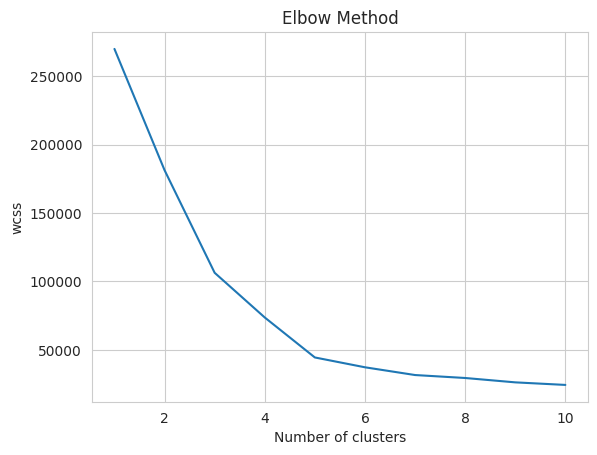

In [ ]:
ax = sns.set_style("whitegrid")
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

The plot shows that there are five clusters.

In [ ]:
#Training the KMeans Clustering Model

kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 0)
y_kmeans = kmeans.fit_predict(new_df)
print(y_kmeans)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


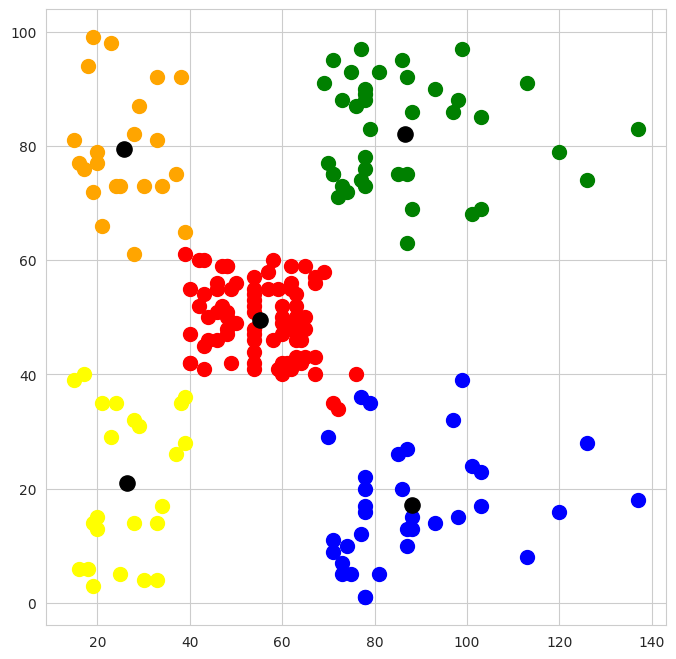

In [ ]:
#Visualizing all the clusters
plt.figure(figsize = (8,8))
plt.scatter(new_df[y_kmeans == 0,0], new_df[y_kmeans == 0,1], s = 100, c = "red", label = "Cluster 1")
plt.scatter(new_df[y_kmeans == 1,0], new_df[y_kmeans == 1,1], s = 100, c = "green", label = "Cluster 2")
plt.scatter(new_df[y_kmeans == 2,0], new_df[y_kmeans == 2,1], s = 100, c = "blue", label = "Cluster 3")
plt.scatter(new_df[y_kmeans == 3,0], new_df[y_kmeans == 3,1], s = 100, c = "yellow", label = "Cluster 4")
plt.scatter(new_df[y_kmeans == 4,0], new_df[y_kmeans == 4,1], s = 100, c = "orange", label = "Cluster 5")

#Plot the centrods

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 120, c = "black", label = "Centroids")